<a href="https://colab.research.google.com/github/VALESOLCORTEZ/ABP_Algebra_Intento/blob/master/ABP_Innovaci%C3%B3n_y_Gesti%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importamos las librerías que vamos a emplear**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Creamos las Data Frames con los archivos obtenidos del dataset**

In [ ]:
url = "/content/customer_data.csv"
Clientes = pd.read_csv(url, encoding="latin-1")
print(Clientes.head())

  ï»¿customer_id  gender   age payment_method
0        C241288  Female  28.0    Credit Card
1        C111565    Male  21.0     Debit Card
2        C266599    Male  20.0           Cash
3        C988172  Female  66.0    Credit Card
4        C189076  Female  53.0           Cash


In [ ]:
url = "/content/sales_data.csv"
Ventas = pd.read_csv(url, encoding="latin-1")
print(Ventas.head())

  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-11-2021   
3    I173702     C988172     Shoes         5  3000.85   16-05-2021   
4    I337046     C189076     Books         4    60.60   24-10-2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon  


# **Exploramos nuestros Dataframes**
**Estructura**

In [ ]:
Clientes.info()
Ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ï»¿customer_id  99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


**Valores nulos, duplicados, formato de fechas y valores atípicos**

In [ ]:
# Valores nulos en Clientes
print("Valores nulos en Clientes:")
print(Clientes.isnull().sum())

# Valores nulos en Ventas
print("\nValores nulos en Ventas:")
print(Ventas.isnull().sum())

Valores nulos en Clientes:
ï»¿customer_id      0
gender              0
age               119
payment_method      0
dtype: int64

Valores nulos en Ventas:
invoice_no       0
customer_id      0
category         0
quantity         0
price            0
invoice_date     0
shopping_mall    0
dtype: int64


**Valores Duplicados**

In [ ]:
# Duplicados en Clientes
print("Duplicados en Clientes:")
print(Clientes.duplicated().sum())

# Duplicados en Ventas
print("\nDuplicados en Ventas:")
print(Ventas.duplicated().sum())

Duplicados en Clientes:
0

Duplicados en Ventas:
0


**Formato de fechas**

In [ ]:
# Formato de fechas en Ventas
print("Tipo de dato de 'invoice_date' en Ventas:")
print(Ventas['invoice_date'].dtype)

# Convertir a formato datetime si es necesario
# Si el tipo de dato no es datetime64[ns], se puede convertir:
# Ventas['invoice_date'] = pd.to_datetime(Ventas['invoice_date'])

Tipo de dato de 'invoice_date' en Ventas:
object


**Valores atípicos**

In [ ]:
# Valores atípicos en Clientes (columna 'age')
print("Estadísticas descriptivas de 'age' en Clientes para identificar posibles atípicos:")
display(Clientes['age'].describe())

# Valores atípicos en Ventas (columnas 'quantity' y 'price')
print("\nEstadísticas descriptivas de 'quantity' en Ventas para identificar posibles atípicos:")
display(Ventas['quantity'].describe())

print("\nEstadísticas descriptivas de 'price' en Ventas para identificar posibles atípicos:")
display(Ventas['price'].describe())

Estadísticas descriptivas de 'age' en Clientes para identificar posibles atípicos:


,age
count,99338.000000
mean,43.425859
std,14.989400
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,69.000000



Estadísticas descriptivas de 'quantity' en Ventas para identificar posibles atípicos:


,quantity
count,99457.000000
mean,3.003429
std,1.413025
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000



Estadísticas descriptivas de 'price' en Ventas para identificar posibles atípicos:


,price
count,99457.000000
mean,689.256321
std,941.184567
min,5.230000
25%,45.450000
50%,203.300000
75%,1200.320000
max,5250.000000


## **Obtenemos el Data Frame "ventas_clientes" y dejamos listos los datos para un analisis exhaustivo**

*   Valores nulos.
*   Formato de fecha.
* Se calcula la facturacion total aprovechando las columnnas "quantity" y "price".  
*   Se renombre la columna ID Cliente

In [ ]:
# Renombrar la columna 'ï»¿customer_id' en Clientes para que coincida con 'customer_id' en Ventas
Clientes.rename(columns={'ï»¿customer_id': 'customer_id'}, inplace=True)

# Combinar los DataFrames Clientes y Ventas
ventas_clientes = pd.merge(Clientes, Ventas, on='customer_id')

# Mostrar las primeras filas del DataFrame combinado y su información
print("Primeras filas del DataFrame combinado:")
display(ventas_clientes.head())

print("\nInformación del DataFrame combinado:")
ventas_clientes.info()

Primeras filas del DataFrame combinado:


,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,2022-08-05,Kanyon
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,2021-12-12,Forum Istanbul
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,2021-11-09,Metrocity
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,2021-05-16,Metropol AVM
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,2021-10-24,Kanyon



Información del DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     99457 non-null  object        
 1   gender          99457 non-null  object        
 2   age             99338 non-null  float64       
 3   payment_method  99457 non-null  object        
 4   invoice_no      99457 non-null  object        
 5   category        99457 non-null  object        
 6   quantity        99457 non-null  int64         
 7   price           99457 non-null  float64       
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [ ]:
# Imputar los valores faltantes de edad con la mediana
mediana_edad = Clientes['age'].median()
Clientes['age'] = Clientes['age'].fillna(mediana_edad)

print("Valores nulos en Clientes después de la imputación:")
print(Clientes.isnull().sum())

Valores nulos en Clientes después de la imputación:
customer_id       0
gender            0
age               0
payment_method    0
dtype: int64


In [ ]:
# Convertir a formato datetime si es necesario
Ventas['invoice_date'] = pd.to_datetime(Ventas['invoice_date'], format='%d-%m-%Y')
print("Tipo de dato de 'invoice_date' después de la conversión:")
print(Ventas['invoice_date'].dtype)

Tipo de dato de 'invoice_date' después de la conversión:
datetime64[ns]


In [ ]:
# Guardar el DataFrame combinado en un archivo CSV
ventas_clientes.to_csv('ventas_clientes.csv', index=False)

print("El DataFrame 'ventas_clientes' ha sido guardado como 'ventas_clientes.csv'. Puedes descargarlo desde el explorador de archivos de Colab.")

El DataFrame 'ventas_clientes' ha sido guardado como 'ventas_clientes.csv'. Puedes descargarlo desde el explorador de archivos de Colab.


**Calculamos la facturación**

In [ ]:
# Calcular la facturación total por transacción
ventas_clientes['total_billing'] = ventas_clientes['quantity'] * ventas_clientes['price']

# Agrupar por categoría de producto y calcular la facturación total por categoría
facturacion_por_categoria = ventas_clientes.groupby('category')['total_billing'].sum().reset_index()
print("Facturación total por categoría de producto:")
display(facturacion_por_categoria)

# Agrupar por centro comercial y calcular la facturación total por sucursal
facturacion_por_sucursal = ventas_clientes.groupby('shopping_mall')['total_billing'].sum().reset_index()
print("\nFacturación total por sucursal (centro comercial):")
display(facturacion_por_sucursal)

# Opcional: Agrupar por categoría y centro comercial para un análisis más detallado
facturacion_por_categoria_y_sucursal = ventas_clientes.groupby(['shopping_mall', 'category'])['total_billing'].sum().reset_index()
print("\nFacturación total por categoría y sucursal:")
display(facturacion_por_categoria_y_sucursal)

Facturación total por categoría de producto:


,category,total_billing
0,Books,8.345529e+05
1,Clothing,1.139968e+08
2,Cosmetics,6.792863e+06
3,Food & Beverage,8.495351e+05
4,Shoes,6.655345e+07
5,Souvenir,6.358247e+05
6,Technology,5.786235e+07
7,Toys,3.980426e+06



Facturación total por sucursal (centro comercial):


,shopping_mall,total_billing
0,Cevahir AVM,12645138.20
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24
3,Istinye Park,24618827.68
4,Kanyon,50554231.10
5,Mall of Istanbul,50872481.68
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
8,Viaport Outlet,12521339.72
9,Zorlu Center,12901053.82



Facturación total por categoría y sucursal:


,shopping_mall,category,total_billing
0,Cevahir AVM,Books,44541.00
1,Cevahir AVM,Clothing,5706321.28
2,Cevahir AVM,Cosmetics,321214.00
3,Cevahir AVM,Food & Beverage,44010.45
4,Cevahir AVM,Shoes,3243918.85
...,...,...,...
75,Zorlu Center,Food & Beverage,41955.06
76,Zorlu Center,Shoes,3535601.47
77,Zorlu Center,Souvenir,28996.56
78,Zorlu Center,Technology,2987250.00


In [ ]:
# Renombrar la columna 'ï»¿customer_id' en Clientes para que coincida con 'customer_id' en Ventas
Clientes.rename(columns={'ï»¿customer_id': 'customer_id'}, inplace=True)

# Combinar los DataFrames Clientes and Ventas
ventas_clientes = pd.merge(Clientes, Ventas, on='customer_id')

# Mostrar las primeras filas del DataFrame combinado and su información
print("Primeras filas del DataFrame combinado:")
display(ventas_clientes.head())

print("\nInformación del DataFrame combinado:")
ventas_clientes.info()

Primeras filas del DataFrame combinado:


,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,2022-08-05,Kanyon
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,2021-12-12,Forum Istanbul
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,2021-11-09,Metrocity
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,2021-05-16,Metropol AVM
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,2021-10-24,Kanyon



Información del DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     99457 non-null  object        
 1   gender          99457 non-null  object        
 2   age             99338 non-null  float64       
 3   payment_method  99457 non-null  object        
 4   invoice_no      99457 non-null  object        
 5   category        99457 non-null  object        
 6   quantity        99457 non-null  int64         
 7   price           99457 non-null  float64       
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 7.6+ MB


# **Establecemos los KPIs (Indicadores claves de rendimiemto)**

In [ ]:
# Calcular Ventas Totales
ventas_totales = ventas_clientes['price'].sum()

# Calcular Cantidad Total Vendida
cantidad_total_vendida = ventas_clientes['quantity'].sum()

# Calcular Número de Facturas Únicas (Transacciones)
numero_facturas_unicas = ventas_clientes['invoice_no'].nunique()

# Calcular Valor Promedio por Transacción
valor_promedio_por_transaccion = ventas_totales / numero_facturas_unicas if numero_facturas_unicas > 0 else 0

print(f"Ventas totales: {ventas_totales:.2f}")
print(f"Cantidad total vendida: {cantidad_total_vendida}")
print(f"Número de facturas únicas: {numero_facturas_unicas}")
print(f"Valor promedio por transacción: {valor_promedio_por_transaccion:.2f}")

Ventas totales: 68551365.91
Cantidad total vendida: 298712
Número de facturas únicas: 99457
Valor promedio por transacción: 689.26


### **Analizamos y visualizamos los datos del dataframe `ventas_clientes` por categoría de producto, método de pago, edad, centro comercial, tiempo y género.**

# Productos


In [ ]:
ventas_por_categoria = ventas_clientes.groupby('category')[['price', 'quantity']].sum().reset_index()
print("Ventas y cantidad vendida por categoría:")
display(ventas_por_categoria)

Ventas y cantidad vendida por categoría:


,category,price,quantity
0,Books,226977.30,14982
1,Clothing,31075684.64,103558
2,Cosmetics,1848606.90,45465
3,Food & Beverage,231568.71,44277
4,Shoes,18135336.89,30217
5,Souvenir,174436.83,14871
6,Technology,15772050.00,15021
7,Toys,1086704.64,30321


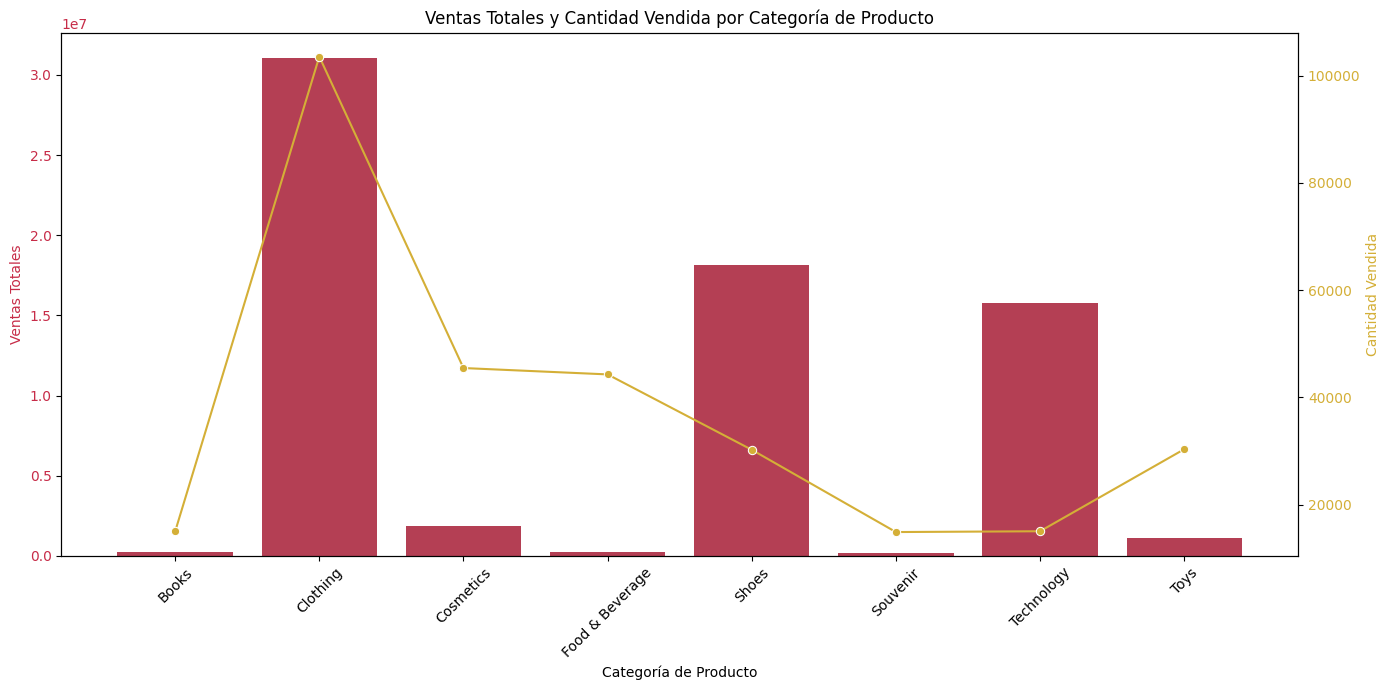

In [ ]:
# Asegurarse de que el dataframe ventas_por_categoria esté disponible
ventas_por_categoria = ventas_clientes.groupby('category')[['price', 'quantity']].sum().reset_index()

# Crear el gráfico combinado con eje Y secundario
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico para Ventas Totales (eje Y primario) - Usando Rojo Carmesí
sns.barplot(x='category', y='price', data=ventas_por_categoria, ax=ax1, color='#C72C48')
ax1.set_title('Ventas Totales y Cantidad Vendida por Categoría de Producto')
ax1.set_xlabel('Categoría de Producto')
ax1.set_ylabel('Ventas Totales', color='#C72C48')
ax1.tick_params(axis='y', labelcolor='#C72C48')
ax1.tick_params(axis='x', rotation=45)


# Crear eje Y secundario para Cantidad Vendida - Usando Dorado Suave
ax2 = ax1.twinx()
sns.lineplot(x='category', y='quantity', data=ventas_por_categoria, ax=ax2, color='#D4AF37', marker='o', sort=False)
ax2.set_ylabel('Cantidad Vendida', color='#D4AF37')
ax2.tick_params(axis='y', labelcolor='#D4AF37')

plt.tight_layout()
plt.show()

# Método de pago




**Reasoning**:
Create a combined bar and line plot with a secondary axis to visualize both total sales and quantity sold by product category on a single chart, with branding colors.

In [ ]:
ventas_por_metodo_pago = ventas_clientes.groupby('payment_method')[['price', 'quantity']].sum().reset_index()
print("Ventas y cantidad vendida por método de pago:")
display(ventas_por_metodo_pago)

Ventas y cantidad vendida por método de pago:


,payment_method,price,quantity
0,Cash,30705030.98,133370
1,Credit Card,24051476.93,105045
2,Debit Card,13794858.00,60297


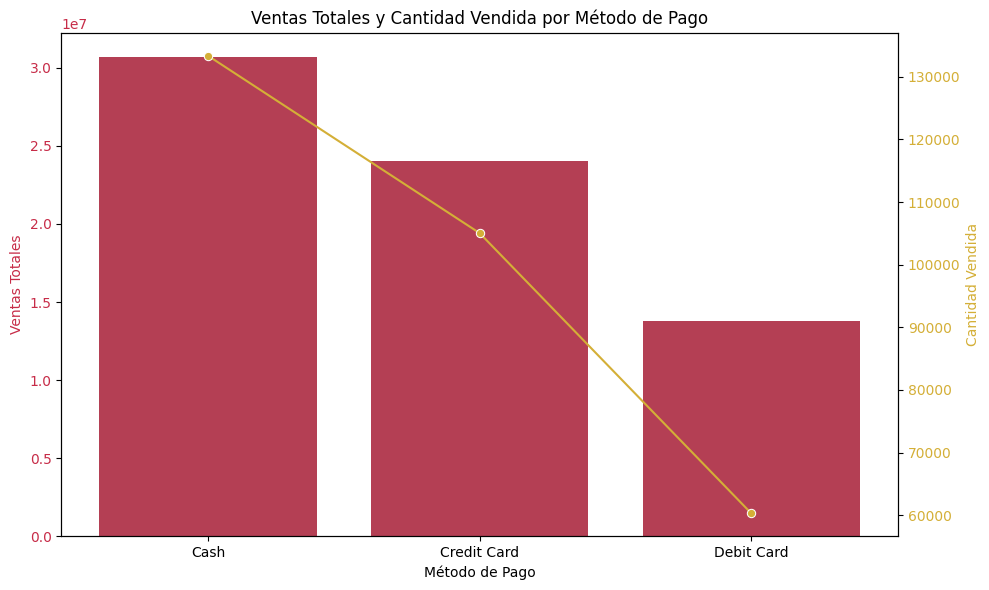

In [ ]:
# Asegurarse de que el dataframe ventas_por_metodo_pago esté disponible
ventas_por_metodo_pago = ventas_clientes.groupby('payment_method')[['price', 'quantity']].sum().reset_index()

# Crear el gráfico combinado con eje Y secundario
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico para Ventas Totales (eje Y primario) - Usando Rojo Carmesí
sns.barplot(x='payment_method', y='price', data=ventas_por_metodo_pago, ax=ax1, color='#C72C48')
ax1.set_title('Ventas Totales y Cantidad Vendida por Método de Pago')
ax1.set_xlabel('Método de Pago')
ax1.set_ylabel('Ventas Totales', color='#C72C48')
ax1.tick_params(axis='y', labelcolor='#C72C48')

# Crear eje Y secundario para Cantidad Vendida - Usando Dorado Suave
ax2 = ax1.twinx()
sns.lineplot(x='payment_method', y='quantity', data=ventas_por_metodo_pago, ax=ax2, color='#D4AF37', marker='o', sort=False)
ax2.set_ylabel('Cantidad Vendida', color='#D4AF37')
ax2.tick_params(axis='y', labelcolor='#D4AF37')

plt.tight_layout()
plt.show()

# Edad


In [ ]:
# Definir intervalos de edad
intervalos_edad = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
etiquetas_edad = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-100']

ventas_clientes['intervalo_edad'] = pd.cut(ventas_clientes['age'], bins=intervalos_edad, labels=etiquetas_edad, right=False)

# Calcular métricas de ventas por intervalo de edad
ventas_por_intervalo_edad = ventas_clientes.groupby('intervalo_edad').agg(
    ventas_totales=('price', 'sum'),
    cantidad_total_vendida=('quantity', 'sum'),
    precio_promedio=('price', 'mean')
).reset_index()

print("Ventas, cantidad vendida y precio promedio por intervalo de edad:")
display(ventas_por_intervalo_edad)

Ventas, cantidad vendida y precio promedio por intervalo de edad:


/tmp/ipython-input-441174159.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_por_intervalo_edad = ventas_clientes.groupby('intervalo_edad').agg(


,intervalo_edad,ventas_totales,cantidad_total_vendida,precio_promedio
0,0-17,0.00,0,NaN
1,18-24,9153000.17,40487,678.804522
2,25-34,13069076.64,57105,685.932748
3,35-44,13572236.98,58405,700.357964
4,45-54,13195901.20,57032,693.389796
5,55-64,12997078.04,56985,684.741480
6,65-74,6486081.39,28345,689.275387
7,75-84,0.00,0,NaN
8,85-100,0.00,0,NaN


/tmp/ipython-input-2875519276.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_por_intervalo_edad = ventas_clientes.groupby('intervalo_edad').agg(


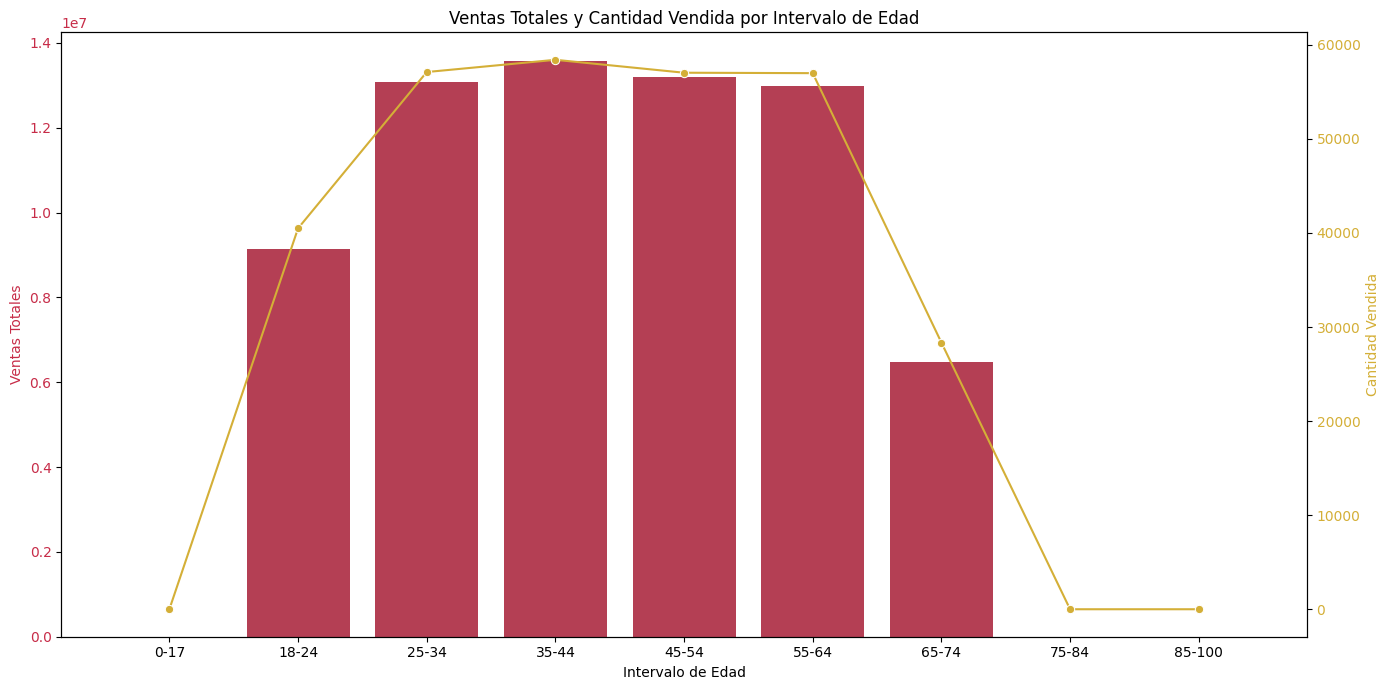

In [ ]:
# Asegurarse de que el dataframe ventas_por_intervalo_edad esté disponible y la columna 'intervalo_edad' creada
intervalos_edad = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
etiquetas_edad = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-100']
ventas_clientes['intervalo_edad'] = pd.cut(ventas_clientes['age'], bins=intervalos_edad, labels=etiquetas_edad, right=False)

ventas_por_intervalo_edad = ventas_clientes.groupby('intervalo_edad').agg(
    ventas_totales=('price', 'sum'),
    cantidad_total_vendida=('quantity', 'sum')
).reset_index()

# Crear el gráfico combinado con eje Y secundario
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico para Ventas Totales (eje Y primario) - Usando Rojo Carmesí
sns.barplot(x='intervalo_edad', y='ventas_totales', data=ventas_por_intervalo_edad, ax=ax1, color='#C72C48')
ax1.set_title('Ventas Totales y Cantidad Vendida por Intervalo de Edad')
ax1.set_xlabel('Intervalo de Edad')
ax1.set_ylabel('Ventas Totales', color='#C72C48')
ax1.tick_params(axis='y', labelcolor='#C72C48')

# Crear eje Y secundario para Cantidad Vendida - Usando Dorado Suave
ax2 = ax1.twinx()
sns.lineplot(x='intervalo_edad', y='cantidad_total_vendida', data=ventas_por_intervalo_edad, ax=ax2, color='#D4AF37', marker='o', sort=False)
ax2.set_ylabel('Cantidad Vendida', color='#D4AF37')
ax2.tick_params(axis='y', labelcolor='#D4AF37')

plt.tight_layout()
plt.show()

# Centro comercial



In [ ]:
ventas_por_centro_comercial = ventas_clientes.groupby('shopping_mall')[['price', 'quantity']].sum().reset_index()
print("Ventas y cantidad vendida por centro comercial:")
display(ventas_por_centro_comercial)

Ventas y cantidad vendida por centro comercial:


,shopping_mall,price,quantity
0,Cevahir AVM,3433671.84,14949
1,Emaar Square Mall,3390408.31,14501
2,Forum Istanbul,3336073.82,14852
3,Istinye Park,6717077.54,29465
4,Kanyon,13710755.24,59457
5,Mall of Istanbul,13851737.62,60114
6,Metrocity,10249980.07,44894
7,Metropol AVM,6937992.99,30530
8,Viaport Outlet,3414019.46,14716
9,Zorlu Center,3509649.02,15234


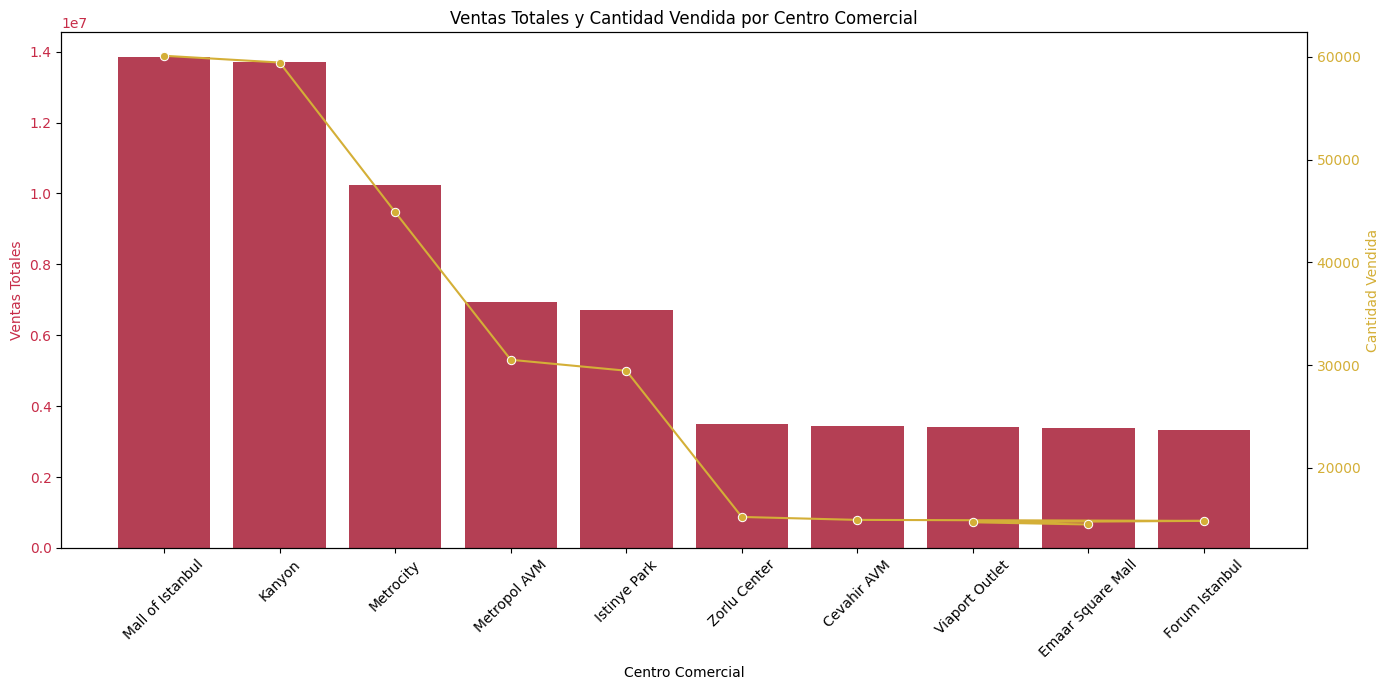

In [ ]:
# Asegurarse de que el dataframe ventas_por_centro_comercial esté disponible
ventas_por_centro_comercial = ventas_clientes.groupby('shopping_mall')[['price', 'quantity']].sum().reset_index()

# Crear el gráfico combinado con eje Y secundario
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico para Ventas Totales (eje Y primario) - Usando Rojo Carmesí
sns.barplot(x='shopping_mall', y='price', data=ventas_por_centro_comercial.sort_values('price', ascending=False), ax=ax1, color='#C72C48')
ax1.set_title('Ventas Totales y Cantidad Vendida por Centro Comercial')
ax1.set_xlabel('Centro Comercial')
ax1.set_ylabel('Ventas Totales', color='#C72C48')
ax1.tick_params(axis='y', labelcolor='#C72C48')
ax1.tick_params(axis='x', rotation=45)


# Crear eje Y secundario para Cantidad Vendida - Usando Dorado Suave
ax2 = ax1.twinx()
sns.lineplot(x='shopping_mall', y='quantity', data=ventas_por_centro_comercial.sort_values('quantity', ascending=False), ax=ax2, color='#D4AF37', marker='o', sort=False)
ax2.set_ylabel('Cantidad Vendida', color='#D4AF37')
ax2.tick_params(axis='y', labelcolor='#D4AF37')
ax2.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

In [ ]:
# Coordenadas de los centros comerciales
coordenadas_sucursales = {
    'Mall of Istanbul': (41.0550, 28.7776),
    'Kanyon': (41.0854, 29.0008),
    'Metrocity': (41.0788, 29.0055),
    'Metropol AVM': (41.0020, 29.1570),
    'Istinye Park': (41.1056, 29.0431),
    'Zorlu Center': (41.0792, 29.0154),
    'Cevahir AVM': (41.0632, 28.9906),
    'Forum Istanbul': (41.0375, 28.8933),
    'Viaport Outlet': (40.9056, 29.3164),
    'Emaar Square Mall': (41.0012, 29.0301)
}

# Mapear las coordenadas al DataFrame ventas_clientes
ventas_clientes['latitud'] = ventas_clientes['shopping_mall'].map(lambda x: coordenadas_sucursales.get(x, (None, None))[0])
ventas_clientes['longitud'] = ventas_clientes['shopping_mall'].map(lambda x: coordenadas_sucursales.get(x, (None, None))[1])

# Calcular las ventas totales por centro comercial para el tamaño de las burbujas
ventas_por_centro_comercial = ventas_clientes.groupby('shopping_mall').agg(
    ventas_totales=('price', 'sum')
).reset_index()

# Unir las coordenadas con los datos de ventas totales por centro comercial
ventas_por_centro_comercial = pd.merge(ventas_por_centro_comercial, pd.DataFrame(list(coordenadas_sucursales.items()), columns=['shopping_mall', 'coords']), on='shopping_mall')
ventas_por_centro_comercial[['latitud', 'longitud']] = pd.DataFrame(ventas_por_centro_comercial['coords'].tolist(), index=ventas_por_centro_comercial.index)

# Calcular el porcentaje de ventas
ventas_por_centro_comercial['porcentaje_ventas'] = (ventas_por_centro_comercial['ventas_totales'] / ventas_por_centro_comercial['ventas_totales'].sum()) * 100

# Paleta de colores de branding
colores_branding = ['#C72C48', '#D4AF37', '#3C3C3C', '#F5F4EC']

# Crear el mapa de burbujas interactivo con colores de branding
import plotly.express as px

fig = px.scatter_mapbox(ventas_por_centro_comercial,
                        lat="latitud",
                        lon="longitud",
                        size="ventas_totales",  # El tamaño de la burbuja representa las ventas totales
                        color="shopping_mall", # Colorear por centro comercial
                        hover_name="shopping_mall", # Mostrar nombre del centro comercial al pasar el ratón
                        hover_data={'ventas_totales': ':.2f', 'porcentaje_ventas': ':.2f%', 'latitud': False, 'longitud': False}, # Mostrar ventas totales y porcentaje
                        zoom=8, # Nivel de zoom inicial
                        height=600,
                        title="Distribución de Ventas por Centro Comercial",
                        color_discrete_sequence=colores_branding) # Aplicando colores de branding

fig.update_layout(mapbox_style="open-street-map") # Estilo de mapa
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

In [ ]:
# Mostrar la tabla con el porcentaje de ventas por centro comercial
print("Porcentaje de ventas por centro comercial:")
display(ventas_por_centro_comercial[['shopping_mall', 'porcentaje_ventas']].sort_values(by='porcentaje_ventas', ascending=False).style.format({'porcentaje_ventas': '{:.0f}%'}))

Porcentaje de ventas por centro comercial:


,shopping_mall,porcentaje_ventas
5,Mall of Istanbul,20%
4,Kanyon,20%
6,Metrocity,15%
7,Metropol AVM,10%
3,Istinye Park,10%
9,Zorlu Center,5%
0,Cevahir AVM,5%
8,Viaport Outlet,5%
1,Emaar Square Mall,5%
2,Forum Istanbul,5%


# En el Tiempo

In [ ]:
ventas_clientes['año'] = ventas_clientes['invoice_date'].dt.year
ventas_clientes['mes'] = ventas_clientes['invoice_date'].dt.month

tendencia_ventas_a_lo_largo_del_tiempo = ventas_clientes.groupby(['año', 'mes']).agg(
    ventas_totales=('price', 'sum')
).reset_index()

tendencia_ventas_a_lo_largo_del_tiempo = tendencia_ventas_a_lo_largo_del_tiempo.sort_values(by=['año', 'mes'])

print("Tendencia de ventas a lo largo del tiempo:")
display(tendencia_ventas_a_lo_largo_del_tiempo)

Tendencia de ventas a lo largo del tiempo:


,año,mes,ventas_totales
0,2021,1,2656422.78
1,2021,2,2358636.34
2,2021,3,2618434.14
3,2021,4,2558825.62
4,2021,5,2662369.93
5,2021,6,2547239.73
6,2021,7,2802468.58
7,2021,8,2632303.32
8,2021,9,2530305.88
9,2021,10,2782418.40


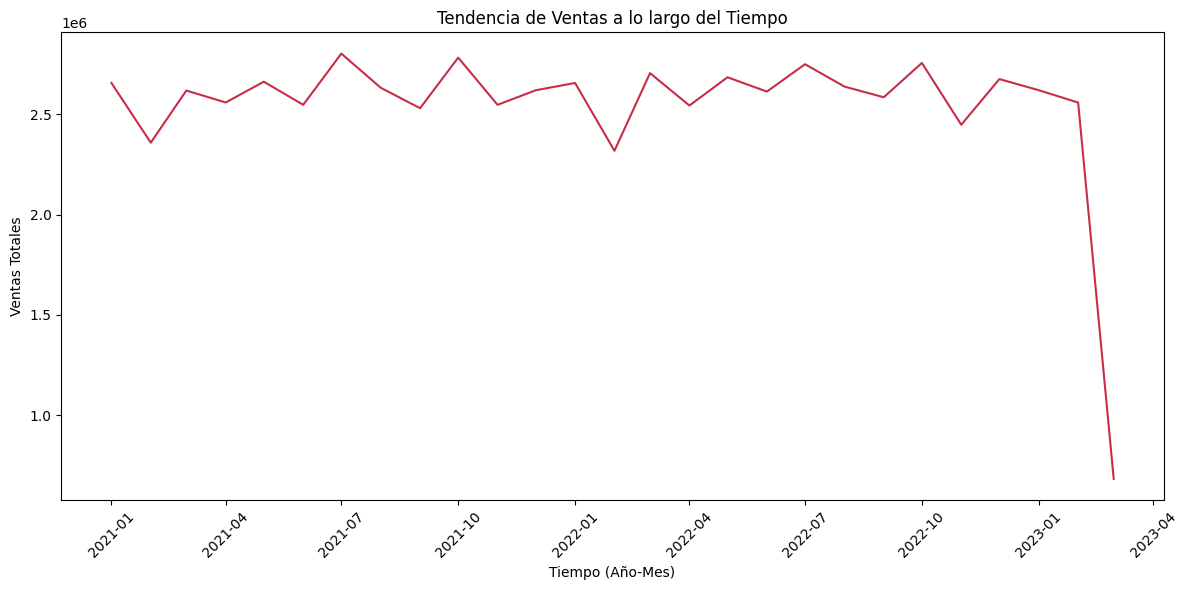

In [ ]:
# Asegurarse de que el dataframe tendencia_ventas_a_lo_largo_del_tiempo esté disponible y la columna 'fecha' creada
ventas_clientes['invoice_date'] = pd.to_datetime(ventas_clientes['invoice_date'], format='%d-%m-%Y')
ventas_clientes['año'] = ventas_clientes['invoice_date'].dt.year
ventas_clientes['mes'] = ventas_clientes['invoice_date'].dt.month

tendencia_ventas_a_lo_largo_del_tiempo = ventas_clientes.groupby(['año', 'mes']).agg(
    ventas_totales=('price', 'sum')
).reset_index()

tendencia_ventas_a_lo_largo_del_tiempo['fecha'] = pd.to_datetime(tendencia_ventas_a_lo_largo_del_tiempo['año'].astype(str) + '-' + tendencia_ventas_a_lo_largo_del_tiempo['mes'].astype(str))


plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha', y='ventas_totales', data=tendencia_ventas_a_lo_largo_del_tiempo, color='#C72C48') # Usando Rojo Carmesí para la línea
plt.title('Tendencia de Ventas a lo largo del Tiempo')
plt.xlabel('Tiempo (Año-Mes)')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Género

In [ ]:
ventas_por_genero = ventas_clientes.groupby('gender').agg(
    ventas_totales=('price', 'sum'),
    cantidad_total_vendida=('quantity', 'sum'),
    precio_promedio=('price', 'mean')
).reset_index()

print("Ventas, cantidad vendida y precio promedio por género:")
display(ventas_por_genero)

Ventas, cantidad vendida y precio promedio por género:


,gender,ventas_totales,cantidad_total_vendida,precio_promedio
0,Female,40931801.62,178659,688.137615
1,Male,27619564.29,120053,690.920933


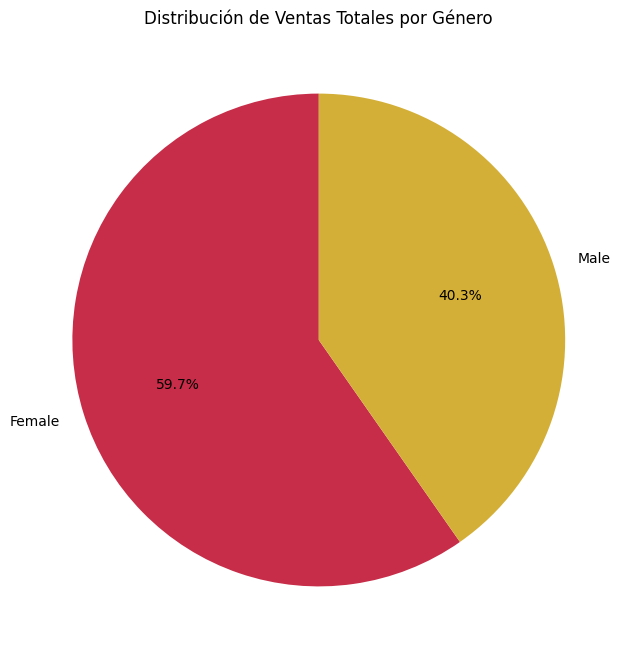

In [ ]:
# Asegurarse de que el dataframe ventas_por_genero esté disponible
ventas_por_genero = ventas_clientes.groupby('gender').agg(
    ventas_totales=('price', 'sum'),
    cantidad_total_vendida=('quantity', 'sum'),
    precio_promedio=('price', 'mean')
).reset_index()

# Paleta de colores personalizada con colores de branding
colores_branding = ['#C72C48', '#D4AF37'] # Rojo Carmesí y Dorado Suave para los dos géneros

# Gráfico circular para Ventas Totales por Género
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_genero['ventas_totales'], labels=ventas_por_genero['gender'], autopct='%1.1f%%', startangle=90, colors=colores_branding)
plt.title('Distribución de Ventas Totales por Género')
plt.show()

# Puedes mantener los gráficos de barras para cantidad vendida y precio promedio si son útiles, o eliminarlos si solo quieres el gráfico de torta.
# plt.figure(figsize=(10, 6))
# sns.barplot(x='gender', y='cantidad_total_vendida', data=ventas_por_genero)
# plt.title('Cantidad Vendida por Género')
# plt.xlabel('Género')
# plt.ylabel('Cantidad Vendida')
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.barplot(x='gender', y='precio_promedio', data=ventas_por_genero)
# plt.title('Precio Promedio por Género')
# plt.xlabel('Género')
# plt.ylabel('Precio Promedio')
# plt.tight_layout()
# plt.show()

# **Analisis solicitado**

## Métodos de pago por rango de edad

**Filtramos el DataFrame `ventas_clientes` para incluir solo los clientes en el rango de edad de 25 a 35 años.**

In [ ]:
ventas_clientes_25_35 = ventas_clientes[(ventas_clientes['age'] >= 25) & (ventas_clientes['age'] <= 35)]
print("Filas del DataFrame filtradas por edad (25-35):")
display(ventas_clientes_25_35.head())

Filas del DataFrame filtradas por edad (25-35):


,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,05-08-2022,Kanyon
5,C657758,Female,28.0,Credit Card,I227836,Clothing,5,1500.40,24-05-2022,Forum Istanbul
7,C176086,Female,32.0,Credit Card,I293112,Clothing,2,600.16,13-01-2021,Mall of Istanbul
11,C191708,Female,29.0,Credit Card,I139207,Books,1,15.15,28-10-2022,Emaar Square Mall
13,C312861,Male,25.0,Cash,I179802,Clothing,2,600.16,17-11-2022,Cevahir AVM


**Agrupamos los datos filtrados por método de pago y contar la cantidad de transacciones para cada método.**

In [ ]:
metodos_pago_25_35 = ventas_clientes_25_35.groupby('payment_method').size().reset_index(name='cantidad_transacciones')
print("Cantidad de transacciones por método de pago para clientes de 25 a 35 años:")
display(metodos_pago_25_35)

Cantidad de transacciones por método de pago para clientes de 25 a 35 años:


,payment_method,cantidad_transacciones
0,Cash,9356
1,Credit Card,7274
2,Debit Card,4263


## Ventas Totales y Cantidad Vendida por Método de Pago y Género



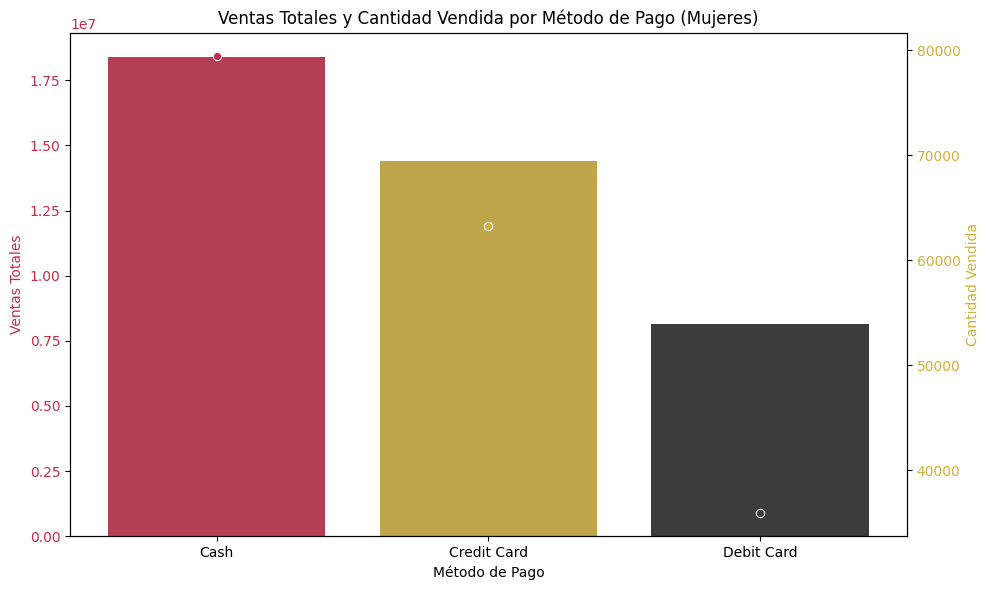

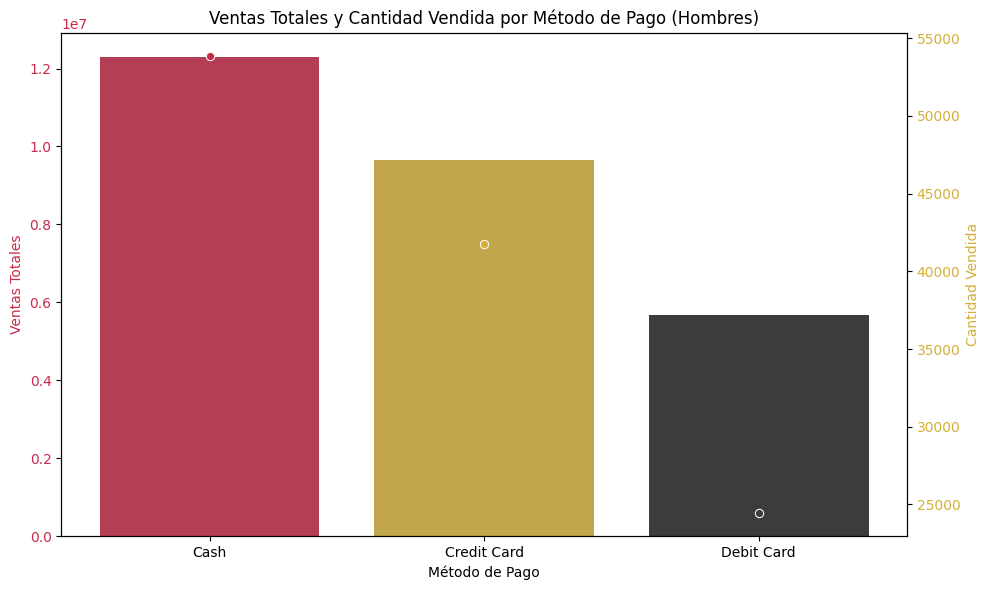

In [ ]:
# Filtrar datos por género (Female)
ventas_mujeres = ventas_clientes[ventas_clientes['gender'] == 'Female']
ventas_mujeres_metodo = ventas_mujeres.groupby('payment_method')[['price', 'quantity']].sum().reset_index()

# Crear el gráfico combinado para mujeres con eje Y secundario
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico para Ventas Totales (eje Y primario) - Diferenciando por Método de Pago con colores de branding
sns.barplot(x='payment_method', y='price', data=ventas_mujeres_metodo, ax=ax1, hue='payment_method', palette=['#C72C48', '#D4AF37', '#3C3C3C'], legend=False)
ax1.set_title('Ventas Totales y Cantidad Vendida por Método de Pago (Mujeres)')
ax1.set_xlabel('Método de Pago')
ax1.set_ylabel('Ventas Totales', color='#C72C48')
ax1.tick_params(axis='y', labelcolor='#C72C48')

# Crear eje Y secundario para Cantidad Vendida - Diferenciando por Método de Pago con colores de branding
ax2 = ax1.twinx()
sns.lineplot(x='payment_method', y='quantity', data=ventas_mujeres_metodo, ax=ax2, hue='payment_method', palette=['#C72C48', '#D4AF37', '#3C3C3C'], marker='o', sort=False, legend=False)
ax2.set_ylabel('Cantidad Vendida', color='#D4AF37')
ax2.tick_params(axis='y', labelcolor='#D4AF37')

plt.tight_layout()
plt.show()

# Filtrar datos por género (Male)
ventas_hombres = ventas_clientes[ventas_clientes['gender'] == 'Male']
ventas_hombres_metodo = ventas_hombres.groupby('payment_method')[['price', 'quantity']].sum().reset_index()

# Crear el gráfico combinado para hombres con eje Y secundario
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico para Ventas Totales (eje Y primario) - Diferenciando por Método de Pago con colores de branding
sns.barplot(x='payment_method', y='price', data=ventas_hombres_metodo, ax=ax1, hue='payment_method', palette=['#C72C48', '#D4AF37', '#3C3C3C'], legend=False)
ax1.set_title('Ventas Totales y Cantidad Vendida por Método de Pago (Hombres)')
ax1.set_xlabel('Método de Pago')
ax1.set_ylabel('Ventas Totales', color='#C72C48')
ax1.tick_params(axis='y', labelcolor='#C72C48')

# Crear eje Y secundario para Cantidad Vendida - Diferenciando por Método de Pago con colores de branding
ax2 = ax1.twinx()
sns.lineplot(x='payment_method', y='quantity', data=ventas_hombres_metodo, ax=ax2, hue='payment_method', palette=['#C72C48', '#D4AF37', '#3C3C3C'], marker='o', sort=False, legend=False)
ax2.set_ylabel('Cantidad Vendida', color='#D4AF37')
ax2.tick_params(axis='y', labelcolor='#D4AF37')

plt.tight_layout()
plt.show()

## Categorización de Clientes por Forma de Pago (por Edad y Género)



/tmp/ipython-input-740432525.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



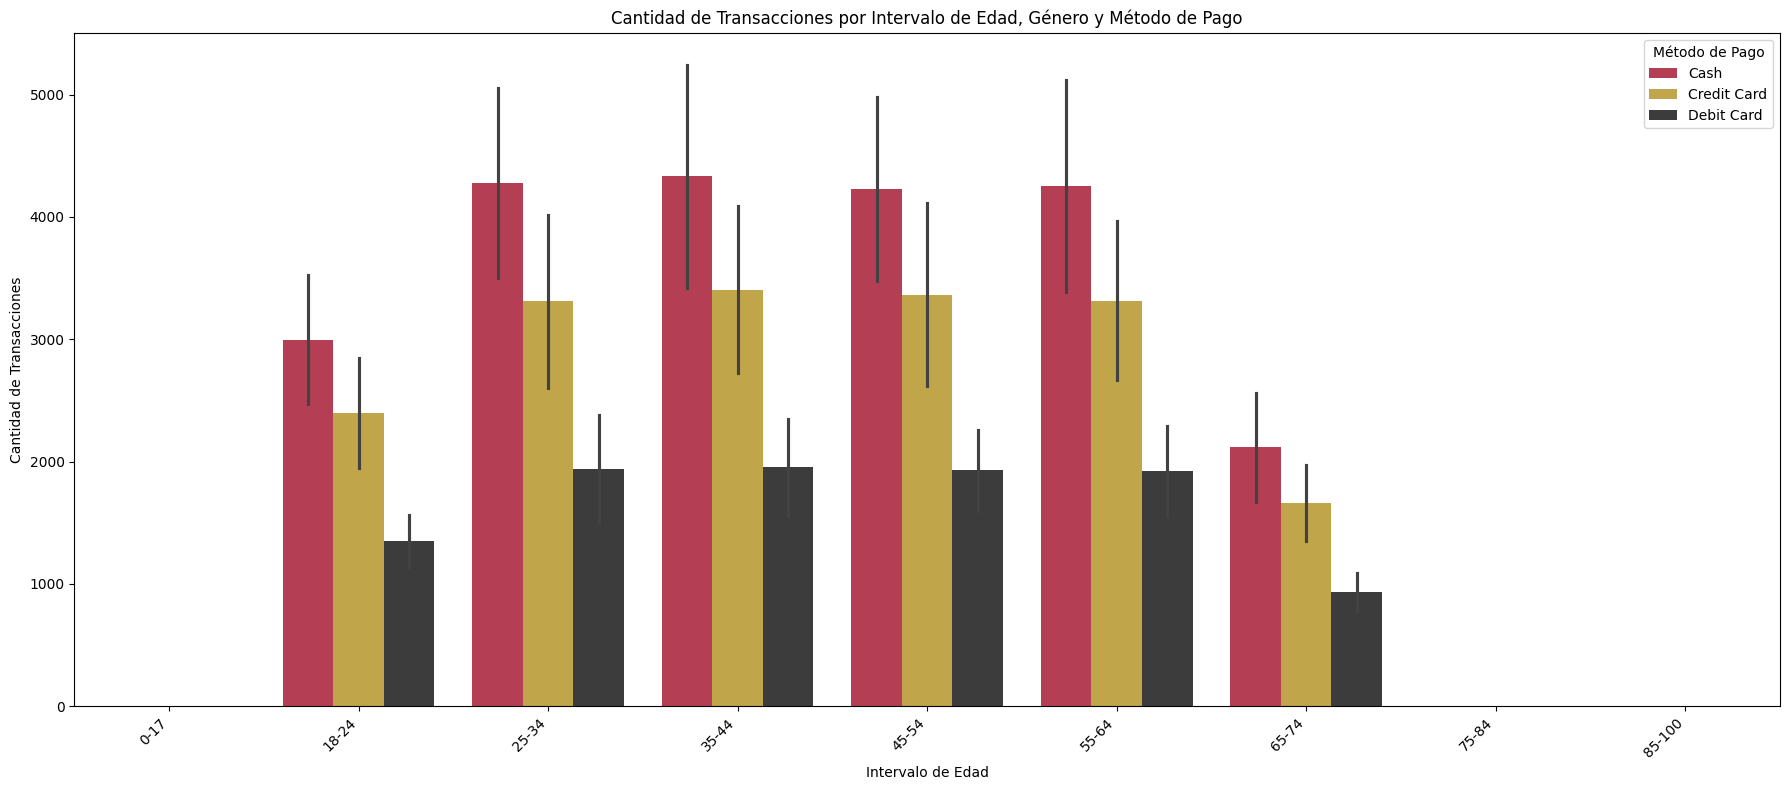

In [ ]:
# Asegurarse de que la columna 'intervalo_edad' esté creada
intervalos_edad = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
etiquetas_edad = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-100']
ventas_clientes['intervalo_edad'] = pd.cut(ventas_clientes['age'], bins=intervalos_edad, labels=etiquetas_edad, right=False)

# Agrupar por intervalo de edad, género y método de pago
categorizacion_por_edad_genero_metodo = ventas_clientes.groupby(['intervalo_edad', 'gender', 'payment_method']).size().reset_index(name='cantidad_transacciones')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(18, 8))
sns.barplot(x='intervalo_edad', y='cantidad_transacciones', hue='payment_method', data=categorizacion_por_edad_genero_metodo, palette=['#C72C48', '#D4AF37', '#3C3C3C']) # Usando colores de branding para el método de pago
plt.title('Cantidad de Transacciones por Intervalo de Edad, Género y Método de Pago')
plt.xlabel('Intervalo de Edad')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Método de Pago')
plt.tight_layout()
plt.show()

# Si también se desea visualizar por género dentro de cada intervalo de edad, se puede crear otro gráfico:
# plt.figure(figsize=(18, 8))
# sns.barplot(x='intervalo_edad', y='cantidad_transacciones', hue='gender', data=categorizacion_por_edad_genero_metodo, palette=['#C72C48', '#D4AF37']) # Usando colores de branding para el género
# plt.title('Cantidad de Transacciones por Intervalo de Edad, Método de Pago y Género')
# plt.xlabel('Intervalo de Edad')
# plt.ylabel('Cantidad de Transacciones')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Género')
# plt.tight_layout()
# plt.show()

## Modo de Pago Más Frecuente por Género


/tmp/ipython-input-2225779830.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




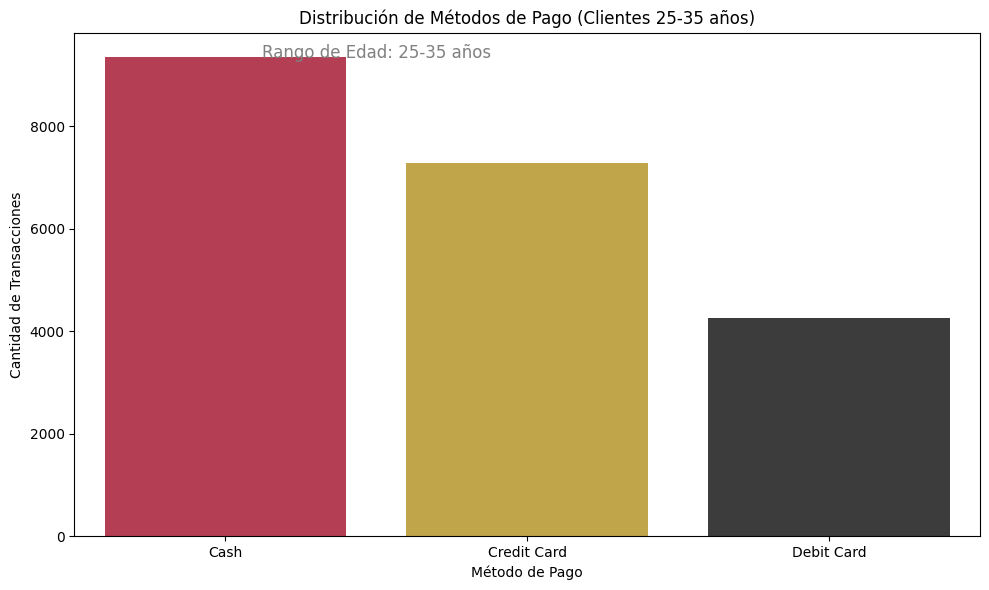

In [ ]:
# Asegurarse de que el dataframe metodos_pago_25_35 esté disponible
ventas_clientes_25_35 = ventas_clientes[(ventas_clientes['age'] >= 25) & (ventas_clientes['age'] <= 35)]
metodos_pago_25_35 = ventas_clientes_25_35.groupby('payment_method').size().reset_index(name='cantidad_transacciones')

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_method', y='cantidad_transacciones', data=metodos_pago_25_35, palette=['#C72C48', '#D4AF37', '#3C3C3C']) # Usando colores de branding
plt.title('Distribución de Métodos de Pago (Clientes 25-35 años)')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.tight_layout()

# Agregar anotación de texto con la referencia de edad
plt.text(0.5, plt.gca().get_ylim()[1] * 0.95, 'Rango de Edad: 25-35 años', horizontalalignment='center', fontsize=12, color='gray')

plt.show()

## Métodos de pago por género




In [ ]:
transacciones_por_genero_metodo = ventas_clientes.groupby(['gender', 'payment_method']).size().reset_index(name='cantidad_transacciones')
print("Cantidad de transacciones por género y método de pago:")
display(transacciones_por_genero_metodo)

Cantidad de transacciones por género y método de pago:


,gender,payment_method,cantidad_transacciones
0,Female,Cash,26509
1,Female,Credit Card,21011
2,Female,Debit Card,11962
3,Male,Cash,17938
4,Male,Credit Card,13920
5,Male,Debit Card,8117


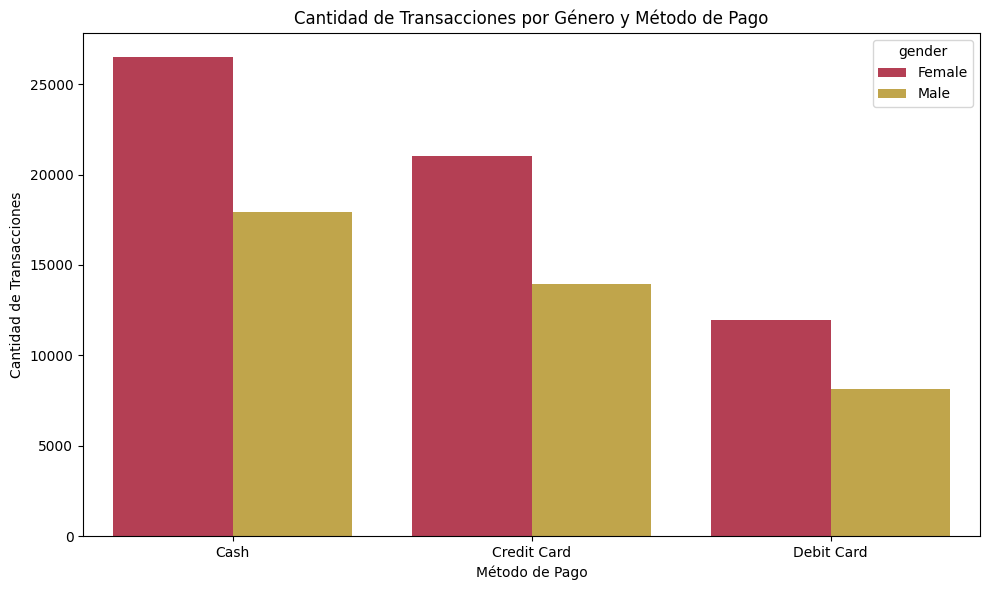

In [ ]:
# Asegurarse de que el dataframe transacciones_por_genero_metodo esté disponible
transacciones_por_genero_metodo = ventas_clientes.groupby(['gender', 'payment_method']).size().reset_index(name='cantidad_transacciones')

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_method', y='cantidad_transacciones', hue='gender', data=transacciones_por_genero_metodo, palette=['#C72C48', '#D4AF37']) # Usando colores de branding para el hue
plt.title('Cantidad de Transacciones por Género y Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.tight_layout()
plt.show()

## Precios por categoría de productos


In [ ]:
precio_por_categoria = ventas_clientes.groupby('category')['price'].agg(['mean', 'median', 'std']).reset_index()
print("Estadísticas descriptivas del precio por categoría de producto:")
display(precio_por_categoria)

Estadísticas descriptivas del precio por categoría de producto:


,category,mean,median,std
0,Books,45.568621,45.45,21.492662
1,Clothing,901.084021,900.24,424.225594
2,Cosmetics,122.448626,121.98,57.458097
3,Food & Beverage,15.671948,15.69,7.422176
4,Shoes,1807.388568,1800.51,845.116269
5,Souvenir,34.894345,35.19,16.564498
6,Technology,3156.935548,3150.00,1481.559805
7,Toys,107.733185,107.52,50.364844


## Precios por categoría de productos



/tmp/ipython-input-1946123957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='price', data=ventas_clientes, palette=['#C72C48', '#D4AF37', '#3C3C3C', '#F5F4EC']) # Usando la paleta de branding
/tmp/ipython-input-1946123957.py:2: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='category', y='price', data=ventas_clientes, palette=['#C72C48', '#D4AF37', '#3C3C3C', '#F5F4EC']) # Usando la paleta de branding


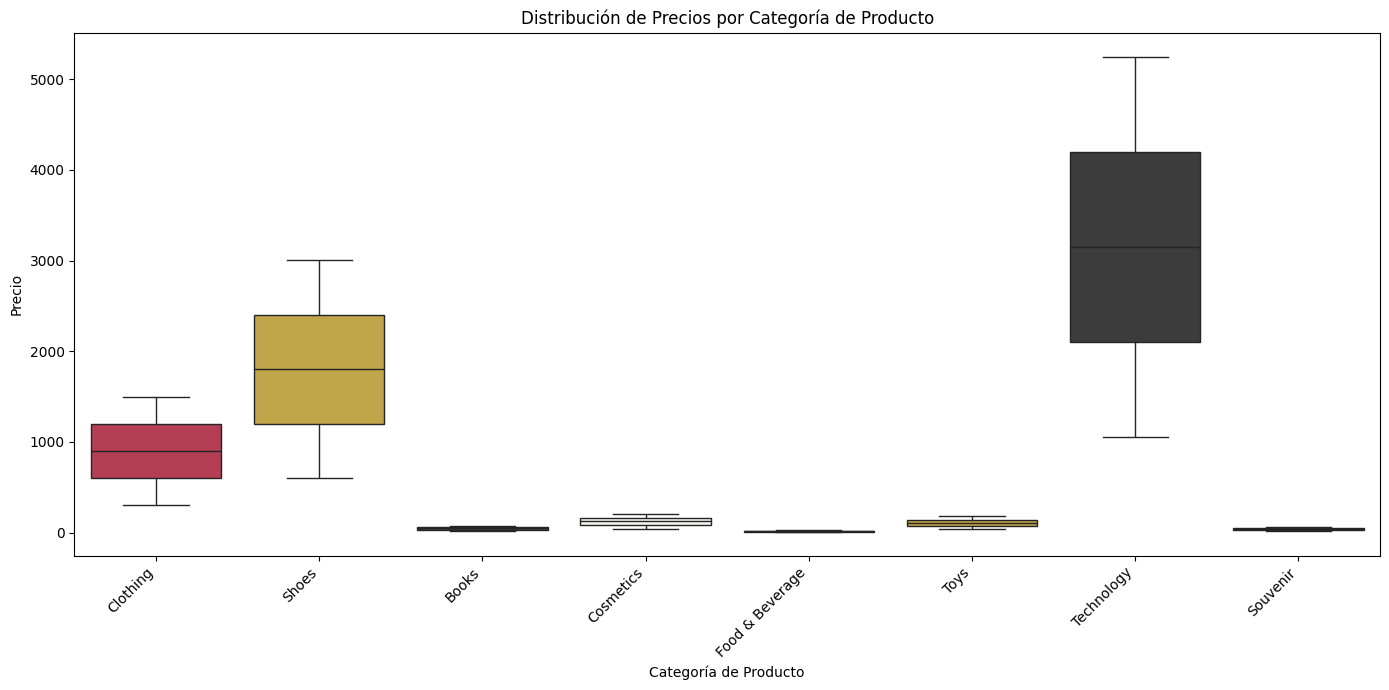

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='category', y='price', data=ventas_clientes, palette=['#C72C48', '#D4AF37', '#3C3C3C', '#F5F4EC']) # Usando la paleta de branding
plt.title('Distribución de Precios por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#  **Analisis Completo**
## Analisis con Pandas
https://docs.google.com/document/d/1dlQiLGC2Ks_ql2i3xXiyYpfDP0HnbE4nTw_WpYHMgu4/edit?usp=sharing

## Base de Datos
https://docs.google.com/document/d/1xm_AZw8mVpY0btIhS_VIK_YSAakmiz_75v61gnG7FvE/edit?usp=sharing

## Informe Cliente
https://docs.google.com/document/d/1qbem08EjS1ZdJ2npn_p6H0CAEC5ypeRtLRvXb0KxaHA/edit?usp=sharing

## ABP
https://docs.google.com/document/d/1i8zAiHNwi36qJpQYT-1cn6-7KcLUzSsUrD0eygxTVm0/edit?usp=sharing